# Classification with Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
%matplotlib inline

## Importing Data

In [2]:
df_train = pd.read_csv('/Users/kaydenfinlayson/Desktop/Python_HW_4/Costa_Rica_Poverty_predictions/train.csv')
df_test = pd.read_csv('/Users/kaydenfinlayson/Desktop/Python_HW_4/Costa_Rica_Poverty_predictions/test.csv')

## Exploring data

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
print(df_test.shape)
print(df_train.shape)

(23856, 142)
(9557, 143)


In [6]:
df_test.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


In [7]:
df_train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


## Removing Objects

In [8]:
z = {"yes" : 1, "no" : 0}
df_test['dependency'] = df_test['dependency'].replace(z).astype(np.float64)
df_test['edjefa'] = df_test['edjefa'].replace(z).astype(np.float64)
df_test['edjefe'] = df_test['edjefe'].replace(z).astype(np.float64)

In [9]:
z = {"yes" : 1, "no" : 0}
df_train['dependency'] = df_train['dependency'].replace(z).astype(np.float64)
df_train['edjefa'] = df_train['edjefa'].replace(z).astype(np.float64)
df_train['edjefe'] = df_train['edjefe'].replace(z).astype(np.float64)

In [10]:
df_test.select_dtypes('object').head()

,Id,idhogar
0,ID_2f6873615,72958b30c
1,ID_1c78846d2,72958b30c
2,ID_e5442cf6a,72958b30c
3,ID_a8db26a79,5b598fbc9
4,ID_a62966799,1e2fc704e


In [11]:
df_train.select_dtypes('object').head()

,Id,idhogar
0,ID_279628684,21eb7fcc1
1,ID_f29eb3ddd,0e5d7a658
2,ID_68de51c94,2c7317ea8
3,ID_d671db89c,2b58d945f
4,ID_d56d6f5f5,2b58d945f


## Identification

- Id
- idhogar
- Target

## Individual

- v18q, owns a tablet
- dis, =1 if disable person
- male, =1 if male
- female, =1 if female
- estadocivil1, =1 if less than 10 years old
- estadocivil2, =1 if free or coupled uunion
- estadocivil3, =1 if married
- estadocivil4, =1 if divorced
- estadocivil5, =1 if separated
- estadocivil6, =1 if widow/er
- estadocivil7, =1 if single
- parentesco1, =1 if household head
- parentesco2, =1 if spouse/partner
- parentesco3, =1 if son/doughter
- parentesco4, =1 if stepson/doughter
- parentesco5, =1 if son/doughter in law
- parentesco6, =1 if grandson/doughter
- parentesco7, =1 if mother/father
- parentesco8, =1 if father/mother in law
- parentesco9, =1 if brother/sister
- parentesco10, =1 if brother/sister in law
- parentesco11, =1 if other family member
- parentesco12, =1 if other non family member
- instlevel1, =1 no level of education
- instlevel2, =1 incomplete primary
- instlevel3, =1 complete primary
- instlevel4, =1 incomplete academic secondary level
- instlevel5, =1 complete academic secondary level
- instlevel6, =1 incomplete technical secondary level
- instlevel7, =1 complete technical secondary level
- instlevel8, =1 undergraduate and higher education
- instlevel9, =1 postgraduate higher education
- mobilephone, =1 if mobile phone
- age, Age in years
- escolari, years of schooling
- rez_esc, Years behind in school

## Household

- v2a1, Monthly rent payment
- hacdor, =1 Overcrowding by bedrooms 
- rooms,  number of all rooms in the house
- hacapo, =1 Overcrowding by rooms
- v14a, =1 has bathroom in the household
- refrig, =1 if the household has refrigerator
- v18q1, number of tablets household owns
- r4h1, Males younger than 12 years of age
- r4h2, Males 12 years of age and older
- r4h3, Total males in the household
- r4m1, Females younger than 12 years of age
- r4m2, Females 12 years of age and older
- r4m3, Total females in the household
- r4t1, persons younger than 12 years of age
- r4t2, persons 12 years of age and older
- r4t3, Total persons in the household
- tamhog, size of the household
- tamviv, number of persons living in the household
- hhsize, household size
- paredblolad, =1 if predominant material on the outside wall is block or brick
- paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
- paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
- pareddes, =1 if predominant material on the outside wall is waste material
- paredmad, =1 if predominant material on the outside wall is wood
- paredzinc, =1 if predominant material on the outside wall is zink
- paredfibras, =1 if predominant material on the outside wall is natural fibers
- paredother, =1 if predominant material on the outside wall is other
- pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
- pisocemento, =1 if predominant material on the floor is cement
- pisoother, =1 if predominant material on the floor is other
- pisonatur, =1 if predominant material on the floor is  natural material
- pisonotiene, =1 if no floor at the household
- pisomadera, =1 if predominant material on the floor is wood
- techozinc, =1 if predominant material on the roof is metal foil or zink
- techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
- techocane, =1 if predominant material on the roof is natural fibers
- techootro, =1 if predominant material on the roof is other
- cielorazo, =1 if the house has ceiling
- abastaguadentro, =1 if water provision inside the dwelling
- abastaguafuera, =1 if water provision outside the dwelling
- abastaguano, =1 if no water provision
- public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
- planpri, =1 electricity from private plant
- noelec, =1 no electricity in the dwelling
- coopele, =1 electricity from cooperative
- sanitario1, =1 no toilet in the dwelling
- sanitario2, =1 toilet connected to sewer or cesspool
- sanitario3, =1 toilet connected to  septic tank
- sanitario5, =1 toilet connected to black hole or letrine
- sanitario6, =1 toilet connected to other system
- energcocinar1, =1 no main source of energy used for cooking (no kitchen)
- energcocinar2, =1 main source of energy used for cooking electricity
- energcocinar3, =1 main source of energy used for cooking gas
- energcocinar4, =1 main source of energy used for cooking wood charcoal
- elimbasu1, =1 if rubbish disposal mainly by tanker truck
- elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
- elimbasu3, =1 if rubbish disposal mainly by burning
- elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
- elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
- elimbasu6, =1 if rubbish disposal mainly other
- epared1, =1 if walls are bad
- epared2, =1 if walls are regular
- epared3, =1 if walls are good
- etecho1, =1 if roof are bad
- etecho2, =1 if roof are regular
- etecho3, =1 if roof are good
- eviv1, =1 if floor are bad
- eviv2, =1 if floor are regular
- eviv3, =1 if floor are good
- hogar_nin, Number of children 0 to 19 in household
- hogar_adul, Number of adults in household
- hogar_mayor, # of individuals 65+ in the household
- hogar_total, # of total individuals in the household
- dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
- edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
-  edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- meaneduc,average years of education for adults (18+)
- bedrooms, number of bedrooms
- overcrowding, # persons per room
- tipovivi1, =1 own and fully paid house
- tipovivi2, "=1 own,  paying in installments"
- tipovivi3, =1 rented
- tipovivi4, =1 precarious
- tipovivi5, "=1 other(assigned,  borrowed)"
- computer, =1 if the household has notebook or desktop computer
- television, =1 if the household has TV
- qmobilephone, # of mobile phones
- lugar1, =1 region Central
- lugar2, =1 region Chorotega
- lugar3, =1 region PacÃƒÂ­fico central
- lugar4, =1 region Brunca
- lugar5, =1 region Huetar AtlÃƒÂ¡ntica
- lugar6, =1 region Huetar Norte
- area1, =1 zona urbana
- area2, =2 zona rural

## SQ

- SQBescolari, escolari squared
- SQBage, age squared
- SQBhogar_total, hogar_total squared
- SQBedjefe, edjefe squared
- SQBhogar_nin, hogar_nin squared
- SQBovercrowding, overcrowding squared
- SQBdependency, dependency squared
- SQBmeaned, square of the mean years of education of adults (>=18) in the household
- agesq, Age squared

## Redundant Variables

In [12]:
del df_test ['SQBescolari']
del df_test ['SQBage']
del df_test ['SQBhogar_total']
del df_test ['SQBedjefe']
del df_test ['SQBhogar_nin']
del df_test ['SQBovercrowding']
del df_test ['SQBdependency']
del df_test ['SQBmeaned']
del df_test ['agesq']

In [13]:
del df_train ['SQBescolari']
del df_train ['SQBage']
del df_train ['SQBhogar_total']
del df_train ['SQBedjefe']
del df_train ['SQBhogar_nin']
del df_train ['SQBovercrowding']
del df_train ['SQBdependency']
del df_train ['SQBmeaned']
del df_train ['agesq']

In [14]:
del df_test ['tamhog']
del df_test ['hogar_total']
del df_test ['r4t3']

In [15]:
del df_train ['tamhog']
del df_train ['hogar_total']
del df_train ['r4t3']

After running to the end of the project and aggregating the data I discovered that not all household agree on target value.  With the help of kernels I was able to use the head of household target to account for this issue.  

In [16]:
same = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
diff = same[same != True]
print('There are {} households where the family members do not all have the same target.'.format(len(diff)))

There are 85 households where the family members do not all have the same target.


In [17]:
 for hh in diff.index:
    true_target = int(df_train[(df_train['idhogar'] == hh) & (df_train['parentesco1'] == 1.0)]['Target'])
    df_train.loc[df_train['idhogar'] == hh, 'Target'] = true_target
    
same = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

diff = same[same != True]
print('There are {} households where the family members do not all have the same target.'.format(len(diff)))

There are 0 households where the family members do not all have the same target.


## Missing Values

In [18]:
df_test.isnull().sum().sort_values(ascending=False).head(10)

rez_esc            19653
v18q1              18126
v2a1               17403
meaneduc              31
abastaguadentro        0
noelec                 0
planpri                0
public                 0
abastaguano            0
abastaguafuera         0
dtype: int64

In [19]:
df_train.isnull().sum().sort_values(ascending=False).head(10)

rez_esc           7928
v18q1             7342
v2a1              6860
meaneduc             5
techozinc            0
techoentrepiso       0
techocane            0
techootro            0
cielorazo            0
sanitario1           0
dtype: int64

### rez_esc

In [20]:
del df_test ['rez_esc']
del df_train ['rez_esc']

### v2a1

- v2a1, Monthly rent payment 
- tipovivi1, =1 own and fully paid house

In [21]:
df_test[df_test["tipovivi1"]==1][["v2a1", "tipovivi1"]]

,v2a1,tipovivi1
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
9,NaN,1
38,NaN,1
44,NaN,1
45,NaN,1
60,NaN,1
61,NaN,1


In [22]:
df_test.loc[df_test.tipovivi1 == 1, 'v2a1'] = 0

In [23]:
df_train[df_train["tipovivi1"]==1][["v2a1", "tipovivi1"]]

,v2a1,tipovivi1
2,NaN,1
13,NaN,1
14,NaN,1
26,NaN,1
32,NaN,1
33,NaN,1
34,NaN,1
35,NaN,1
36,NaN,1
42,NaN,1


In [24]:
df_train.loc[df_train.tipovivi1 == 1, 'v2a1'] = 0

In [25]:
df_train = df_train.drop(df_train.loc[df_train['v2a1'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['v2a1'].isnull()].index)

### v18q1

In [26]:
df_test.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    15977
1        0
Name: v18q1, dtype: int64

In [27]:
df_test['v18q1'] = df_test['v18q1'].fillna(0)

In [28]:
df_train['v18q1'] = df_train['v18q1'].fillna(0)

### meaneduc

In [29]:
df_train = df_train.drop(df_train.loc[df_train['meaneduc'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['meaneduc'].isnull()].index)

In [30]:
df_test.isnull().sum().sort_values(ascending=False).head(10)

age                0
epared3            0
pisomadera         0
techozinc          0
techoentrepiso     0
techocane          0
techootro          0
cielorazo          0
abastaguadentro    0
abastaguafuera     0
dtype: int64

In [31]:
df_train.isnull().sum().sort_values(ascending=False).head(10)

Target             0
pisonotiene        0
techozinc          0
techoentrepiso     0
techocane          0
techootro          0
cielorazo          0
abastaguadentro    0
abastaguafuera     0
abastaguano        0
dtype: int64

In [32]:
print(df_test.shape)
print(df_train.shape)

(21362, 129)
(8603, 130)


## Aggregating data 

The data needs to be consolodated so each household is an entry

In [33]:
hhlist = []

for ID in df_train["idhogar"].unique():
    hhlist.append(df_train[df_train["idhogar"] == ID].mean())

In [34]:
df_hh = pd.DataFrame(hhlist)

In [35]:
df_hh.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,190000.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,4.0
1,135000.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,4.0
2,0.0,0.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,92.0,4.0
3,180000.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,4.0
4,130000.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,4.0


In [36]:
df_hh["Target"].value_counts()

4.0    1810
2.0     366
3.0     322
1.0     184
Name: Target, dtype: int64

In [37]:
df_hh.shape

(2682, 128)

## Understabing the remaining data

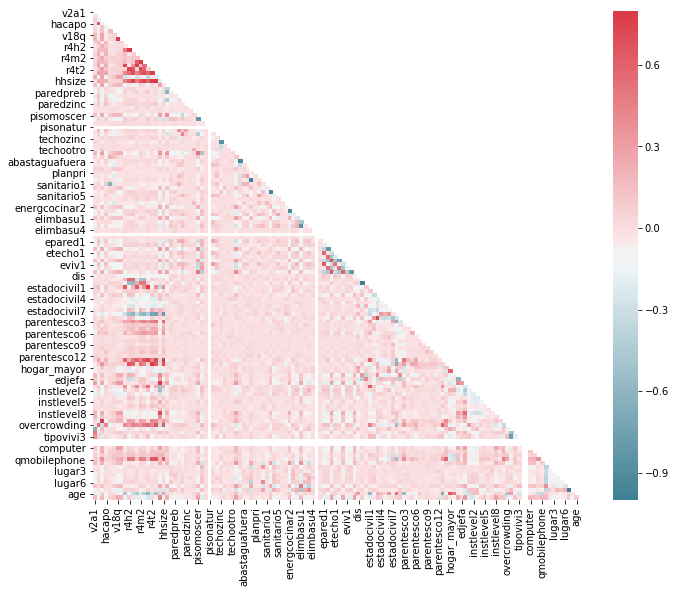

In [38]:
corrmat = df_hh.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.8, square=True)

## Modeling

In [39]:
x_train = df_train.loc[:, ~df_train.columns.isin(["Target", "idhogar", "Id"])]
y_train = df_train["Target"]
x_test = df_test.loc[:, ~df_test.columns.isin(["Target", "idhogar", "Id"])]
y_test = df_train["Target"]

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression 

Logistic = LogisticRegression()
Logistic.fit(x_train, y_train)
y_pred_train = Logistic.predict(x_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [43]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_train))


Accuracy: 0.6661629664070673


Logistic regression is less complex and the accuracy is about where I would expect it to be. 

### Random Forest 

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred_train = clf.predict(x_train)

In [69]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_train))

Accuracy: 1.0
